In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10924\4146946750.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 200s 289ms/step - loss: 0.2987 - accuracy: 0.8712 - val_loss: 0.2092 - val_accuracy: 0.9132
Epoch 2/10
625/625 [==============================] - 214s 343ms/step - loss: 0.2405 - accuracy: 0.8972 - val_loss: 0.2582 - val_accuracy: 0.8864
Epoch 3/10
625/625 [==============================] - 168s 268ms/step - loss: 0.2237 - accuracy: 0.9043 - val_loss: 0.2281 - val_accuracy: 0.9016
Epoch 4/10
625/625 [==============================] - 153s 244ms/step - loss: 0.2092 - accuracy: 0.9092 - val_loss: 0.1913 - val_accuracy: 0.9178
Epoch 5/10
625/625 [==============================] - 152s 243ms/step - loss: 0.2011 - accuracy: 0.9136 - val_loss: 0.1957 - val_accuracy: 0.9156
Epoch 6/10
625/625 [==============================] - 154s 246ms/step - loss: 0.1866 - accuracy: 0.9209 - val_loss: 0.2129 - val_accuracy: 0.9120
Epoch 7/10
625/625 [==============================] - 162s 258ms/step - loss: 0.1760 - accuracy: 0.9266 - val_loss: 0.1849 -

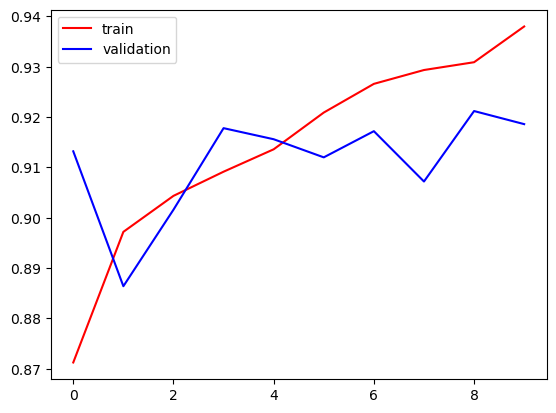

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

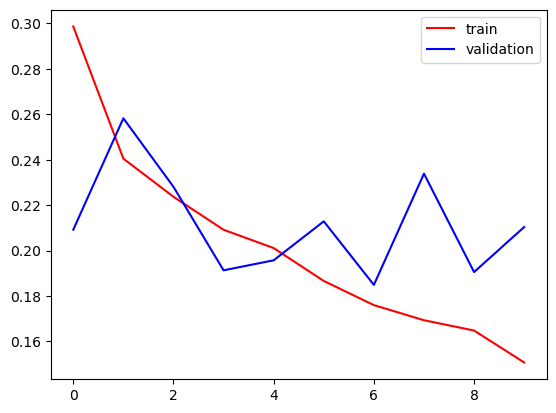

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()